# 06wk-1: 합성곱신경망 (2)

최규빈  
2024-04-08

<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/06wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-wjNGgd4gmQJbQ66NLjUC2y&si=dusDZAwGOJS9TOKJ >}}

# 2. Imports

In [184]:
import torch
import torchvision
import matplotlib.pyplot as plt
from fastai.data.all import *
from fastai.vision.all import * 

# 3. torch.eigensum

## A. transpose

In [633]:
tsr = torch.arange(12).reshape(4,3)
tsr

In [634]:
tsr.t()

In [635]:
torch.einsum('ij->ji',tsr)

## B. 행렬곱

In [623]:
tsr1 = torch.arange(12).reshape(4,3).float()
tsr2 = torch.arange(15).reshape(3,5).float()

In [624]:
tsr1.shape

In [625]:
tsr2.shape

In [626]:
tsr1 @ tsr2

In [627]:
torch.einsum('ij,jk -> ik',tsr1,tsr2) 

## C. 이미지자료의 차원변환

# 4. MNIST – 직접설계

In [200]:
path = untar_data(URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [620]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t\t',yy.dtype)

torch.Size([50000, 3, 32, 32])   torch.float32
torch.Size([50000])              torch.int64
torch.Size([10000, 3, 32, 32])   torch.float32
torch.Size([10000])              torch.int64

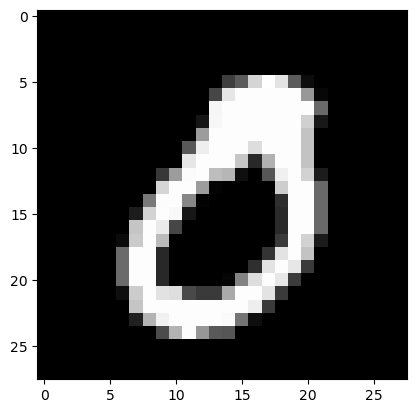

In [202]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

## A. y: (n,3)-float

In [203]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y.argmax(axis=1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy.argmax(axis=1)).float().mean():.4f}')

train: 0.9858
val: 0.9917

## B. y: (n,)-int

In [204]:
y = y.argmax(axis=-1)
yy = yy.argmax(axis=-1)
y,yy

In [205]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([18623, 1, 28, 28])   torch.float32
torch.Size([18623])          torch.int64
torch.Size([3147, 1, 28, 28])    torch.float32
torch.Size([3147])       torch.int64

In [206]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}') # <-- 여기수정
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}') # <-- 여기수정

train: 0.9780
val: 0.9822

# 5. Fashion-MNIST – fastai

`-` Data

In [207]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')
def rshp(row):
    return row.reshape(1,28,28)
X = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))).float()
XX  = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))).float()
y = torch.tensor(np.array(df_train.label))
yy  = torch.tensor(np.array(df_test.label))

In [208]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([60000, 1, 28, 28])   torch.float32
torch.Size([60000])          torch.int64
torch.Size([10000, 1, 28, 28])   torch.float32
torch.Size([10000])          torch.int64

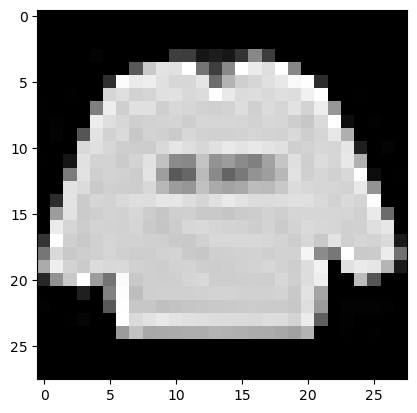

In [209]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

## A. torch

In [210]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9095
val: 0.8692

## B. fastai

In [211]:
# Step1: 데이터정리 (dls생성)
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=5000) 
dls = DataLoaders(dl1,dl2)
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
#optimizr = torch.optim.Adam(net.parameters())
lrnr = Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[accuracy]
)
# Step3: 적합 
lrnr.fit(10)
# Step4: 예측 및 평가 

lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9089
val: 0.8690

# 6. 알렉스넷 (Krizhevsky, Sutskever, and Hinton 2012)

## A. 알렉스넷의 의미

`-` 야사로 배우는 인공지능: <https://brunch.co.kr/@hvnpoet/109>

## B. 알렉스넷의 아키텍처 써보기

`-` 알렉스넷의 아키텍처:

-ref:
<https://en.wikipedia.org/wiki/AlexNet#:~:text=AlexNet%20is%20the%20name%20of,at%20the%20University%20of%20Toronto.>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/480px-Comparison_image_neural_networks.svg.png)

`-` 써보면..

In [673]:
conv1(img).shape

In [ ]:
torch.nn.Conv2d(3,96,(11,11),st

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(3,96),
    torch.nn.MaxPool2d((3,3)),
    torch.nn.Conv2d(

# 7. CIFAR10 – transfer

## A. `dls` 만들자

`-` X,y를 얻자.

In [642]:
path = untar_data(URLs.CIFAR)
path.ls()

In [643]:
labels = [str(l).split('/')[-1] for l in (path/'train').ls()]
labels

In [644]:
X = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'train/{l}').ls()],axis=0).float()/255
XX = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'test/{l}').ls()],axis=0).float()/255
y = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'train/{l}').ls()])
yy = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'test/{l}').ls()])

In [645]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([50000, 3, 32, 32])   torch.float32
torch.Size([50000])          torch.int64
torch.Size([10000, 3, 32, 32])   torch.float32
torch.Size([10000])          torch.int64

`-` 데이터를 시각화해보자.

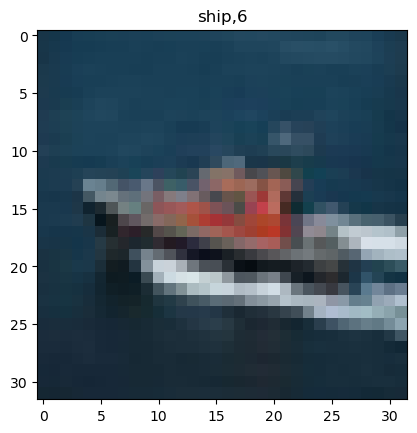

In [458]:
ylabel = [l for l in labels for fname in (path/f'train/{l}').ls()]
i = 30002
plt.imshow(torch.einsum('cij->ijc',X[i]))
plt.title(f'{ylabel[i]},{y[i]}')

-   넘.. 어려운뎅?
-   스트레스받아..

`-` 아무튼 dls를 만들자.

In [550]:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
dls = DataLoaders(dl1,dl2)

`-` 아래와 같이 쉽게 만들수도있음…

In [551]:
# dls = ImageDataLoaders.from_folder(path,train='train',valid='test')
# dls.show_batch()

## B. 수제네트워크로 학습

`-` 시도1: 이게 좀 힘들어요 ㅎㅎ

In [561]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
dls = DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.1000
val: 0.0999

-   ????

`-` 시도2: 셔플!

In [562]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
dls = DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.6746
val: 0.6173

`-` 시도3: 복잡하게..

In [563]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,256,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(256,64,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64,16,(5,5)),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1600,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.7019
val: 0.6599

## C. TransferLearning으로 학습

`-` ResNet18을 다운로드

In [564]:
net = torchvision.models.resnet18(weights=torchvision.models.resnet.ResNet18_Weights.IMAGENET1K_V1)
net

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/cgb3/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 111MB/s] 

`-` 마지막의 레이어만 수정

In [577]:
net.fc = torch.nn.Linear(512,10)

`-` 학습해보자.

In [587]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
# Step2:
net = torchvision.models.resnet18(weights=torchvision.models.resnet.ResNet18_Weights.IMAGENET1K_V1)
net.fc = torch.nn.Linear(512,10)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9603
val: 0.7943

`-` 좀 더 fastai에 가깝게..

In [602]:
# Step1:
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')
# Step2:
lrnr = vision_learner(
    dls=dls,
    arch=resnet18,
    #--#
    metrics=[accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# lrnr.model.to("cpu")
# print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
# print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

# A1. 자잘한 용어 정리 ($\star$)

## A. 지도학습

`-` 우리가 수업에서 다루는 데이터는 주로 아래와 같은 느낌이다.

1.  데이터는 $(X,y)$의 형태로 정리되어 있다.

2.  $y$는 우리가 관심이 있는 변수이다. 즉 우리는 $y$를 적절하게 추정하는
    것에 관심이 있다.

3.  $X$는 $y$를 추정하기 위해 필요한 정보이다.

|  $X$ = 설명변수 = 독립변수   | $y$ = 반응변수 = 종속변수  |     비고     |     순서     |           예시           |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
|            이미지            |          카테고리          | 합성곱신경망 |   상관없음   |  개/고양이 이미지 구분   |
|         유저,아이템          |            평점            |  추천시스템  |   상관없음   |    넷플릭스 영화추천     |
|     과거~오늘까지의주가      |          내일주가          |  순환신경망  | 순서상관있음 |         주가예측         |
| 처음 $m$개의 단어(혹은 문장) | 이후 1개의 단어(혹은 문장) |  순환신경망  | 순서상관있음 |     챗봇, 텍스트생성     |
| 처음 $m$개의 단어(혹은 문장) |          카테고리          |  순환신경망  | 순서상관있음 | 영화리뷰 텍스트 감정분류 |

`-` 이러한 문제상황, 즉 $(X,y)$가 주어졌을때 $X \to y$를 추정하는 문제를
supervised learning 이라한다.

## B. 모델이란?

> 모델이란 단어는 제 발작버튼이었어요..

`-` 통계학에서 모델은 y와 x의 관계를 의미하며 오차항의 설계를 포함하는
개념이다. 이는 통계학이 “데이터 = 정보 + 오차”의 관점을 유지하기
때문이다. 따라서 통계학에서 모델링이란

$$y_i = net(x_i) + \epsilon_i$$

에서 (1) 적절한 함수 $net$를 선택하는 일 (2) 적절한 오차항 $\epsilon_i$
을 설계하는일 모두를 포함한다.

`-` 딥러닝 혹은 머신러닝에서 모델은 단순히

$$y_i \approx net(x_i)$$

를 의미하는 경우가 많다. 즉 “model=net”라고 생각해도 무방하다. 이 경우
“모델링”이란 단순히 적절한 $net$을 설계하는 것만을 의미할 경우가 많다.

`-` 그래서 생긴일

-   통계학교재 특: 분류문제와 회귀문제를 엄밀하게 구분하지 않는다. 사실
    오차항만 다를뿐이지 크게보면 같은 회귀모형이라는 관점이다. 그래서
    일반화선형모형(GLM)이라는 용어를 쓴다.
-   머신러닝/딥러닝교재 특: 회귀문제와 분류문제를 구분해서 설명한다.
    (표도 만듦) 이는 오차항에 대한 기술을 모호하게 하여 생기는 현상이다.

## C. 학습이란?

`-` 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
“규칙” 혹은 “원리”를 찾는 것이다.

-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “맵핑”을 찾는 것이다.
-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “함수”을 찾는 것이다. 즉 $y\approx f(X)$가 되도록 만드는 $f$를 잘
    찾는 것이다. (이 경우 “함수를 추정한다”라고 표현)
-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “모델” 혹은 “모형”을 찾는 것이다. 즉 $y\approx model(X)$가 되도록
    만드는 $model$을 잘 찾는 것이다. (이 경우 “모형을 학습시킨다”라고
    표현)
-   **학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는
    어떠한 “네트워크”을 찾는 것이다. 즉 $y\approx net(X)$가 되도록
    만드는 $net$을 잘 찾는 것이다. (이 경우 “네트워크를 학습시킨다”라고
    표현)**

`-` prediction이란 학습과정에서 찾은 “규칙” 혹은 “원리”를 $X$에 적용하여
$\hat{y}$을 구하는 과정이다. 학습과정에서 찾은 규칙 혹은 원리는
$f$,$model$,$net$ 으로 생각가능한데 이에 따르면 아래가 성립한다.

-   $\hat{y} = f(X)$
-   $\hat{y} = model(X)$
-   $\hat{y} = net(X)$

## D. $\hat{y}$를 부르는 다양한 이름

`-` $\hat{y}$는 $X$가 주어진 자료에 있는 값인지 아니면 새로운 값 인지에
따라 지칭하는 이름이 미묘하게 다르다.

1.  $X \in data$: $\hat{y}=net(X)$ 는 predicted value, fitted value 라고
    부른다.

2.  $X \notin data$: $\hat{y}=net(X)$ 는 predicted value, predicted
    value with new data 라고 부른다.

`-` 경우1은 “$loss$ = $y$ 와 $\hat{y}$ 의 차이” 를 정의할 수 있으나
경우2는 그렇지 않다.

## E. 다양한 코드들

`-` 파이썬 코드..

``` python
#Python
predictor.fit(X,y) # autogluon 에서 "학습"을 의미하는 과정
model.fit(X,y) # sklearn 에서 "학습"을 의미하는 과정
learner.learn() # fastai 에서 "학습"을 의미하는 과정
learner.fine_tune(1) # fastai 에서 "부분학습"을 의미하는 과정
learner.predict(cat1) # fastai 에서 "예측"을 의미하는 과정 
model.fit(x, y, batch_size=32, epochs=10) # keras에서 "학습"을 의미하는 과정
model.predict(test_img) # keras에서 "예측"을 의미하는 과정 
```

`-` R 코드..

``` r
# R
ols <- lm(y~x) # 선형회귀분석에서 학습을 의미하는 함수
ols$fitted.values # 선형회귀분석에서 yhat을 출력 
predict(ols, newdata=test) # 선형회귀분석에서 test에 대한 예측값을 출력하는 함수
ols$coef # 선형회귀분석에서 weight를 확인하는 방법
```

# A2. 참고자료들

`-` 케라스/텐서플로우: <https://guebin.github.io/STBDA2022/>

`-` 상속:
<https://guebin.github.io/PP2023/posts/03_Class/2023-06-12-15wk-1.html>

`-` sklearn/autogluon: <https://guebin.github.io/MP2023/>

`-` 리눅스관련: <https://guebin.github.io/DSTBX2024/> – 자료 부실함..
강의영상 없는것 많음..

# A3. DNN, ANN, MLP

`-` DNN 은 깊은신경망, ANN 은 인공신경망, MLP 는 다층퍼셉트론이라
번역된다.

`-` 아래의 네트워크는 ANN이라 볼 수 있다. 또한 레이어가 2개 있으므로
MLP라고 볼 수 있다. DNN 이라 보기는 애매하다. (그래서 이걸
얕은신경망(shallow network)이라고 표현하기도 합니다)

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Sigmoid()
)
```

`-` 아래의 네트워크는 ANN이라 볼 수 있다. 또한 레이어가 7개 있으므로
MLP라고 볼 수 있다. 이 정도면 깊어보이니까 DNN 이라 주장할 수
있어보인다.

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Sigmoid(),    
)
```

`-` 아래의 네트워크는 ANN이라 볼 수 있다. 또한 레이어가 3개 있으므로
MLP라고 볼 수 있다. 이건 DNN이라고 봐야하나? 깊다기 보다는 넓은
신경망인데…

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1048576),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1048576,out_features=1048576),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1048576,out_features=1),
    torch.nn.Sigmoid(),    
)
```

`-` 아래의 네트워크도 ANN이라 볼 수 있다.[1] 레이어는 2장이지만 MLP라고
부르진 않는다.

``` python
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)), # <-- 학습할 파라메터
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2304,1), # <-- 학습할 파라메터
    torch.nn.Sigmoid()
)
```

`-` 야매개념: 요즘은 거의 ANN $\approx$ MLP $\approx$ DNN 의 느낌으로
이해해도 무방함

-   어지간한 모형은 다 ANN이라 우길 수 있다. 회귀분석도, 로지스틱분석도
    마음먹으면 ANN으로 우길 수 있다. 그래서 “ANN을 썼다”라는건 엄청
    모호한 말이다. 이런 이유로 사람들은 거의 MLP를 쓴 경우에 ANN을
    썼다고 하고, 회귀모형을 쓴 경우에는 굳이 ANN을 썼다고 표현하지
    않는다.
-   MLP과 DNN은 구분이 모호하다. 하나이상의 은닉층만 포함하고 있으면
    MLP라고 부를 수 있다. 적은 노드수를 유지하면서 은닉층을 여러개 쓰면
    깊은 신경망이라고 하고, 많은 노드를 사용하면서 은닉층을 얇게, 그리고
    노드를 많이 쓰면 넓은신경망이라고 한다. 노드수와 관계없이 층이 얇은
    경우는 얕은신경망이라고 한다.[2] 즉 MLP의 모양에 따라서
    “깊은신경망”, “얕은신경망”, “넓은신경망” 등의 용어를 사용한다.
-   일반적으로 은닉층이 1개있으면 얕은신경망, 2개 이상이면
    깊은신경망이라고 부른다고 합의되어있다. (은닉층이 2층까지
    얕은신경망이라고 부르는 사람도 존재함) 얼마나 많은 노드부터
    넓은신경망이라고 부르는지는 (제가 아는 한) 합의된바가 없다. 얼마나
    깊을때 DNN으로 부를지 명확한 합의가 되어있지 않다. (3층-MLP부터
    DNN으로 부르는 방식이 지지를 얻는듯. 그렇지만 4층-MLP 부터 DNN으로
    부르는 사람도 존재함.)
-   MLP의 정의가 가장 깔끔하다고 생각하지만 요즘 잘 쓰는 용어는 아니다.
    (MLP의 논문은 너무 예전임. 층을 세는것도 다름)
-   **제 결론**: 따지고 보자면 DNN $\subset$ MLP $\subset$ ANN 이다.
    그렇지만 MLP이지만 DNN은 아닌 네트워크를 지칭한다든가, ANN 이지만
    MLP는 아닌 네트워크를 지칭하는 일은 흔하지 않으며, 지칭하더라도
    부연설명을 친절하게 해준다. 따라서 부연설명 없이 ANN, MLP, DNN 을
    지칭한다면 거의 DNN을 의미한다고 봐도 무방하다. 즉 ANN $\approx$ MLP
    $\approx$ DNN 라고 보면 된다. (엄밀하게는 틀린개념이죠)

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E Hinton. 2012. “Imagenet
Classification with Deep Convolutional Neural Networks.” *Advances in
Neural Information Processing Systems* 25.

[1] 그렇지만 이걸 ANN이라고 부르는 사람은 없는듯

[2] 저는 이 표현 너무 싫어해요